In [9]:
# ATMS 305, Fall 2024 -- Lab24: Blue Marble
# We'll work more with Cartopy mapping and Blue Marble imagery.

In [2]:
# >> Given: IMPORT
# install needed modules for matplotlib.pyplot, cartopy
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.image as img

In [11]:
!wget -q -N https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73884/world.topo.bathy.200411.3x5400x2700.png

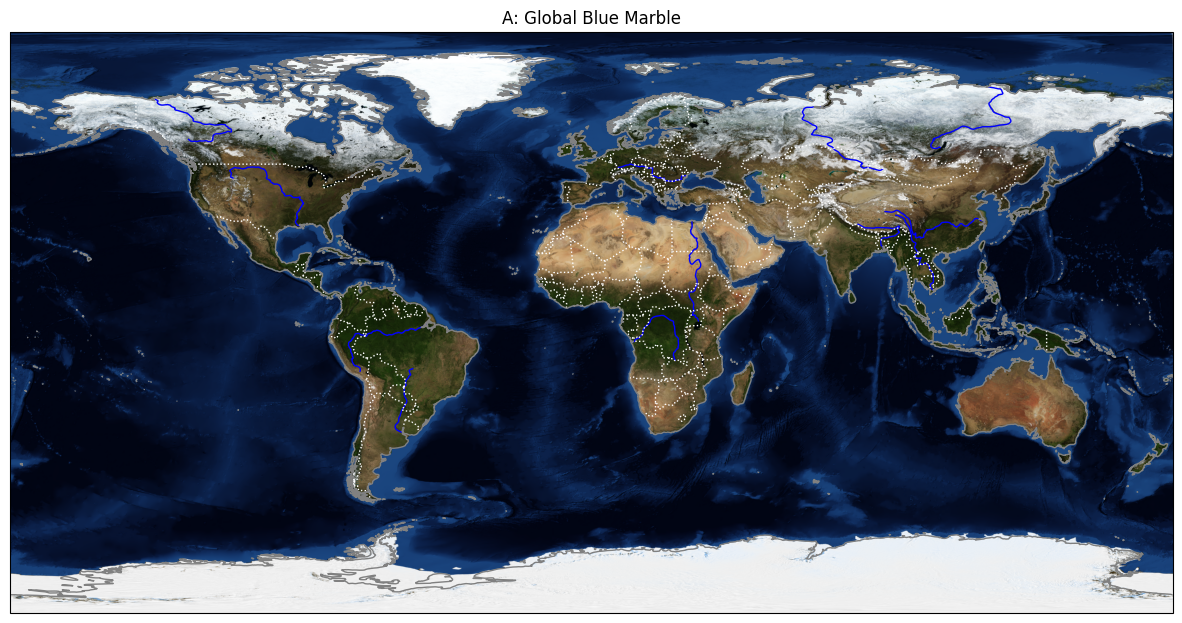

In [15]:
# >> A. BLUE MARBLE - GLOBAL
#
# 1. Start a new figure. Choose a size (I used 15,8)
# 2. Start a PlateCarree projection with plt.axes() as done before
#
# 3. In a new tab, go to: https://visibleearth.nasa.gov/collection/1484/blue-marble
# 4. Click on one of the Blue Marble Next Generation topography views
#   a) when you click on it, it opens a page at bottom
#   b) on bottom of page, click on one of the 5400x2700 images,
#      >> THEN right-click & get the image link address from >the Download button<
#   c) you don't need to download the image -- just get its URL
#
# 5. Get, read and display the image
#   a) In wget, use the -N option to not re-read something you already have!!
#   b) Read the image into variable "world"
#   c) FYI, a note: much larger images sometimes require different steps to read in.
#   d) Display (imshow) this 'world' image as we did before in the Quakes assignment.
#
# 6. Use add_feature to add RIVERS and BORDERS
#     - borders should use linestyle=':' and edgecolor set to 'white'
# 7. Add coastlines with 1:50,000,000 ('50m') resolution
#
# 8. Don't add oceans or lakes! It would overwrite the image.
# 9. Set for a global domain
# 10. Use ax.set_title to add a title: A: Global Blue Marble
# 11. To get rid of all the extraneous text messages,
#     end your Python code statements with ";" when possible.
world = img.imread('world.topo.bathy.200411.3x5400x2700.png')
fig = plt.figure(figsize=(15, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(world, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.add_feature(cfeature.RIVERS, edgecolor='blue')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='white')
ax.coastlines(color="gray",resolution='50m')
ax.set_global()
ax.set_title('A: Global Blue Marble');

In [12]:
!wget -q -N https://eoimages.gsfc.nasa.gov/images/imagerecords/57000/57735/land_ocean_ice_cloud_2048.jpg

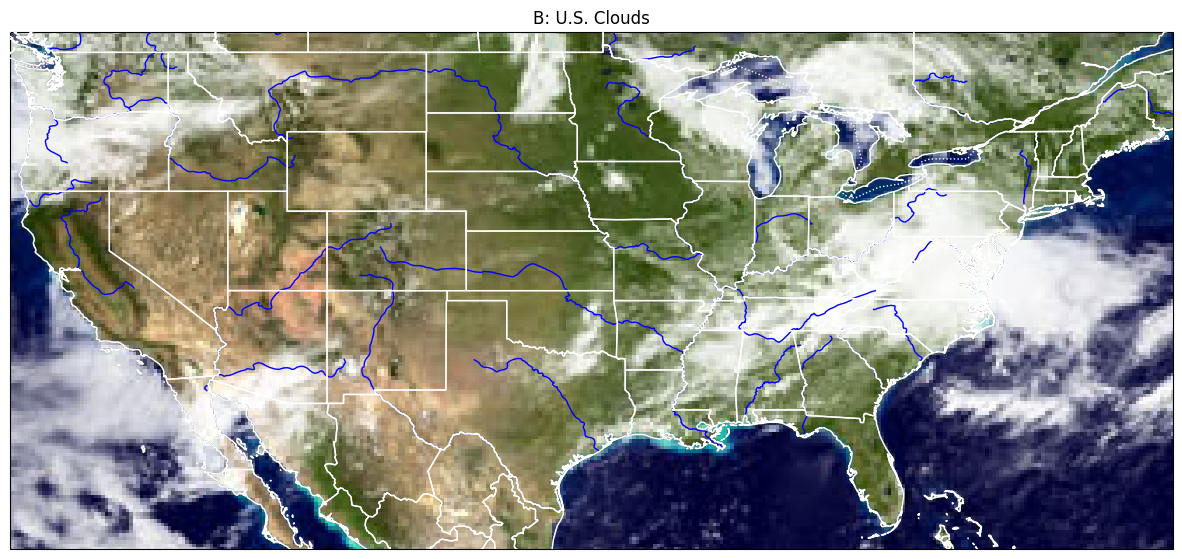

In [13]:
# >> B. BLUE MARBLE - U.S. (fuzzy clouds)
#
# 1. Copy the code from the last cell here, BUT
#   a) Back on the visible earth web page, go to the last page (or, in the
#      Keyword Search box at top, search for: Land Surface, Ocean Color
#   b) Select the 2048x1024 JPEG image, and get the URL by right-clicking on
#      the Download button, or click Download and get the URL there.
#
#   c) Retrieve (wget -N) and read in (imread) the image (into Python variable 'clouds').
#      Make sure you use the correct image name in imread() !!
#      Remember: image name for imread() is at end of the URL, after the last "/".
#   d) Display the "clouds" image similar to how you did the "world" in cell A, above.
#
# 2. Stick with PlateCarree projection, but --
#   a) comment out the set_global statement
#   b) use set_extent() for a U.S. map region, as we have done before
# 3. Add the same overlays as before, with edgecolor 'white'.
#
# 4. Add states and provinces, and coastlines
#   a) for BORDERS, as well as states and provinces, use edgecolor 'white'
#      in the add_feature statement (it is just an option before closing parenthesis)
#   b) for scale= in state_provinces AND for resolution= in coastlines, use '50m'
#      ... this is a 1-to-50 million scale.  110m is less detailed, 10m is more.
# 5. Add a title: B: U.S. Clouds
clouds = img.imread('land_ocean_ice_cloud_2048.jpg')
fig = plt.figure(figsize=(15, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(clouds, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.add_feature(cfeature.RIVERS, edgecolor='blue')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='white')
ax.coastlines(color="gray",resolution='50m')
# ax.set_global()
states_provinces = cfeature.STATES.with_scale('10m')
ax.add_feature(states_provinces, edgecolor='white', zorder=10)
ax.set_extent([-125, -66.5, 24, 50], crs=ccrs.PlateCarree())
ax.set_title('B: U.S. Clouds');

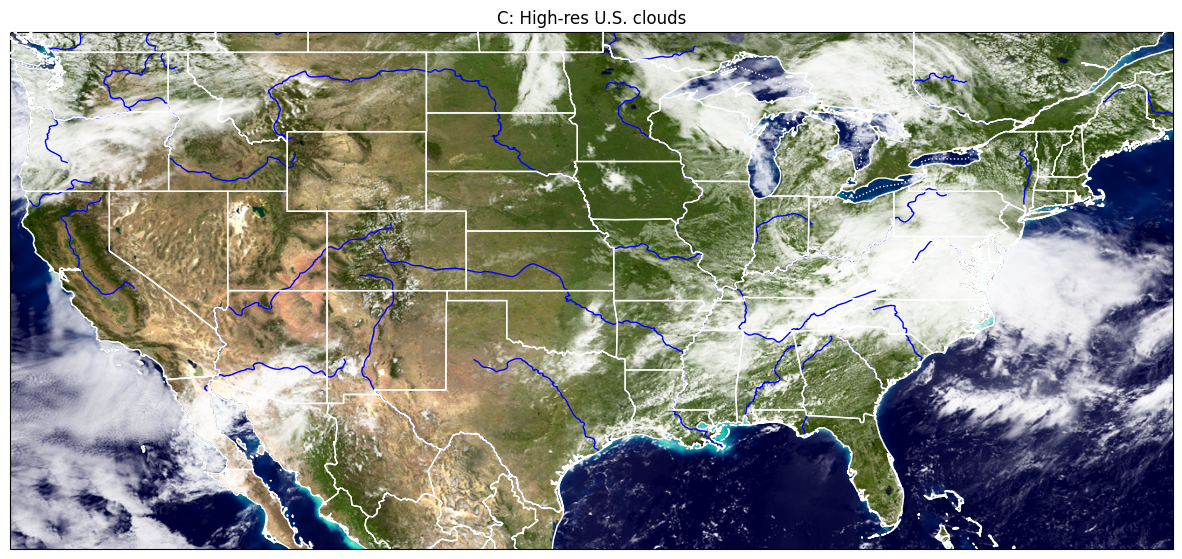

In [15]:
# >> C. HIGH RESOLUTION clouds
#
# The last image was fuzzy. 2048x1024 sounds detailed, but not when it
# covers the entire Earth.  Let's fix that.
#
# 1. Copy the code from the last cell here, BUT
#   a) Use high-resolution clouds ...
#      instead of the 2048x1024 JPEG, click on link for the 49 MB TIFF
#   b) Copy the URL; get, read image >into "highres"< instead of "clouds"
#      The wget takes awhile ... might not want "-q" (quiet) in the wget,
#      to monitor the progress.
#   c) Show this high-res clouds image.
#
# 2. Everything else is the same, except
#   a) Finish with title "C: High-res U.S. clouds"
!wget -q -N https://eoimages.gsfc.nasa.gov/images/imagerecords/57000/57735/land_ocean_ice_cloud_8192.tif

highres = img.imread('land_ocean_ice_cloud_8192.tif')
fig = plt.figure(figsize=(15, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(highres, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.add_feature(cfeature.RIVERS, edgecolor='blue')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='white')
ax.coastlines(color="gray",resolution='50m')
# ax.set_global()
states_provinces = cfeature.STATES.with_scale('10m')
ax.add_feature(states_provinces, edgecolor='white', zorder=10)
ax.set_extent([-125, -66.5, 24, 50], crs=ccrs.PlateCarree())
ax.set_title('C: High-res U.S. clouds');

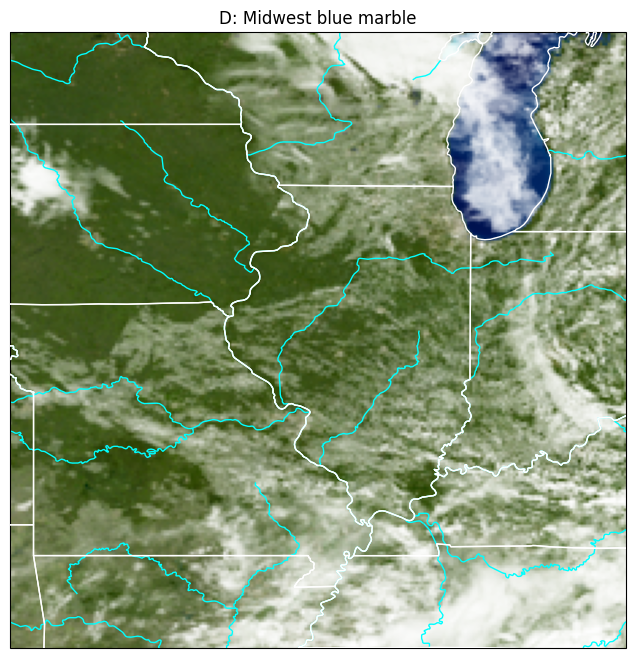

In [16]:
# >> D. BLUE MARBLE - Midwest
#
# 1. As before, but set_extent for the midwest: [-95, -85, 35, 45]
# 2. Use high-res clouds
# 3. Add lakes, rivers, borders, states_provinces, BUT
#      - use 1:10,000,000 scale for states/provinces and coastlines
#      - for rivers, use option to set edgecolor 'cyan'
# 4. Add title: D: Midwest blue marble
#    It doesn't look very high-resolution, now ...

fig = plt.figure(figsize=(15, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(highres, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.set_extent([-95, -85, 35, 45], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.RIVERS, edgecolor='cyan')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='white')
ax.coastlines(color="gray",resolution='50m')
# ax.set_global()
states_provinces = cfeature.STATES.with_scale('10m')
ax.add_feature(states_provinces, edgecolor='white', zorder=10)
ax.set_title('D: Midwest blue marble');

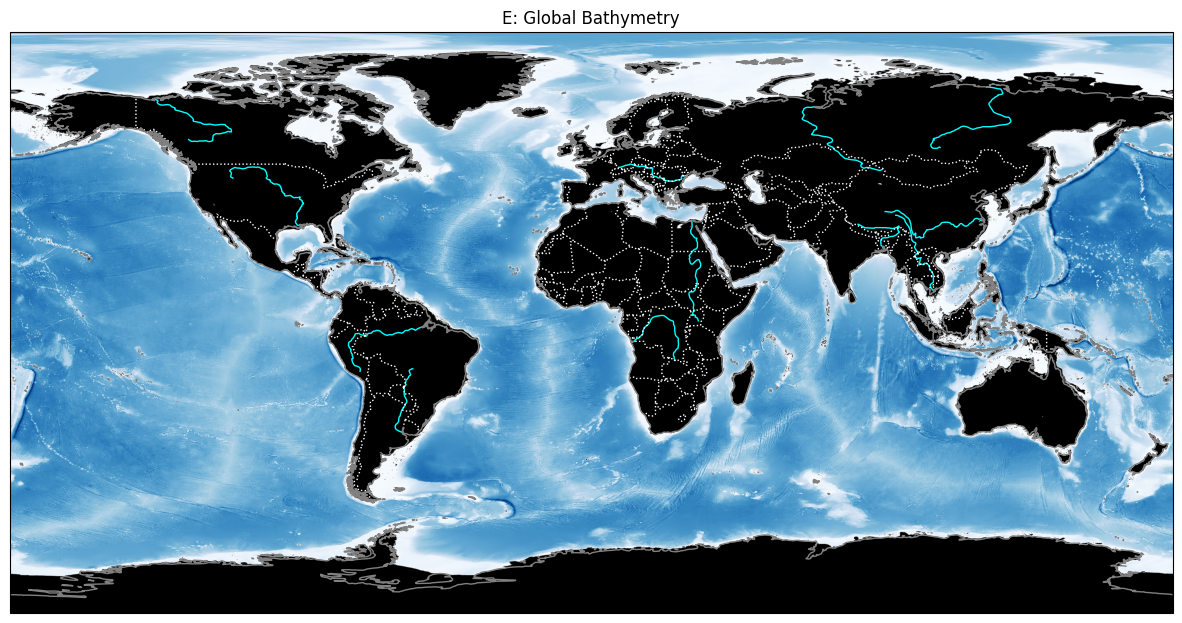

In [17]:
# >> E. Pick a *DIFFERENT OVERLAY image*
#
#      A different image, such as Bathymetry, or Clouds plus ocean color etc.
#  1. Show your image
#  2. Make a global map.
#  3. Add RIVERS and BORDERS, and use 1:50,000,000 coastlines.
#       Set an appropriate title like "E: your-image-title"
!wget -q -N https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73963/gebco_08_rev_bath_3600x1800_color.jpg
bath = img.imread('gebco_08_rev_bath_3600x1800_color.jpg')
fig = plt.figure(figsize=(15, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(bath, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
#ax.set_extent([-95, -85, 35, 45], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.RIVERS, edgecolor='cyan')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='white')
ax.coastlines(color="gray",resolution='50m')
#ax.set_global()
#states_provinces = cfeature.STATES.with_scale('10m')
#ax.add_feature(states_provinces, edgecolor='white', zorder=10)
ax.set_title('E: Global Bathymetry');

In [25]:
!wget -q -N https://neo.gsfc.nasa.gov/archive/bluemarble/bmng/world_2km/world.200411.3x21600x10800.jpg
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
world2km = np.array(Image.open('world.200411.3x21600x10800.jpg'), dtype=np.uint8)

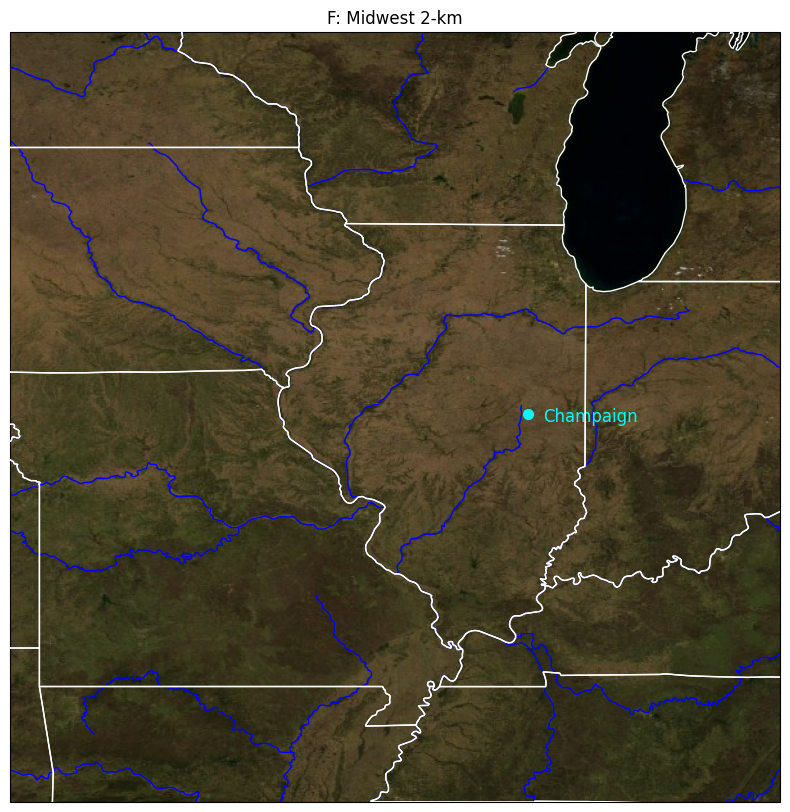

In [37]:
# >> F. 2-KM MIDWEST MAP
#
#  1. Download a 2-km region map from one of these files:
#       https://neo.gsfc.nasa.gov/archive/bluemarble/bmng/world_2km/
#    a) ... note the sizes in the file listing; some are over 100 MB !!
#    b) download may be slow.  I would omit the quiet (-q) option in "wget".
#  2. Choose a large figure size; I used (15,10)
#  3. Produce a zoomed-in map over the Midwest as done above.
#       Use 1:10,000,000 scale !!
#       If your image is light, use edgecolor 'black' for states/provinces
#  4. If plt.imread() doesn't work because the image is too big, either:
#    a) Select a smaller image, or
#    b) Open the image without using plt.imread -->
#       !pip install pillow     # may not be necessary on Colab
#       from PIL import Image
#       Image.MAX_IMAGE_PIXELS = None
#       world2km = np.array(Image.open('YourBIGworldImage.jpg'), dtype=np.uint8);
#       More info: https://stackoverflow.com/questions/56174099/
#          /how-to-load-images-larger-than-max-image-pixels-with-pil
#    c) Display with imshow as usual.
#  5. Add states_provinces, BORDERS, and LAKES.
#  6. As in the past, put a cyan dot AND text to show the location of a
#     city that is in this domain.  For example, the CMI airport is -88.277, 40.039
#  7. Add a title: "F: Midwest 2-km"
fig = plt.figure(figsize=(15, 10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(world2km, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.set_extent([-95, -85, 35, 45], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.RIVERS, edgecolor='blue')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='white')
ax.coastlines(color="gray",resolution='50m')
# ax.set_global()
states_provinces = cfeature.STATES.with_scale('10m')
ax.add_feature(states_provinces, edgecolor='white', zorder=10)
ax.text(-88.277 + 0.2, 40.039 - 0.1, 'Champaign', transform=ccrs.PlateCarree(), fontsize=12, color='cyan')
ax.scatter(-88.277, 40.039, color='cyan', s=50, transform=ccrs.PlateCarree())
ax.set_title('F: Midwest 2-km');

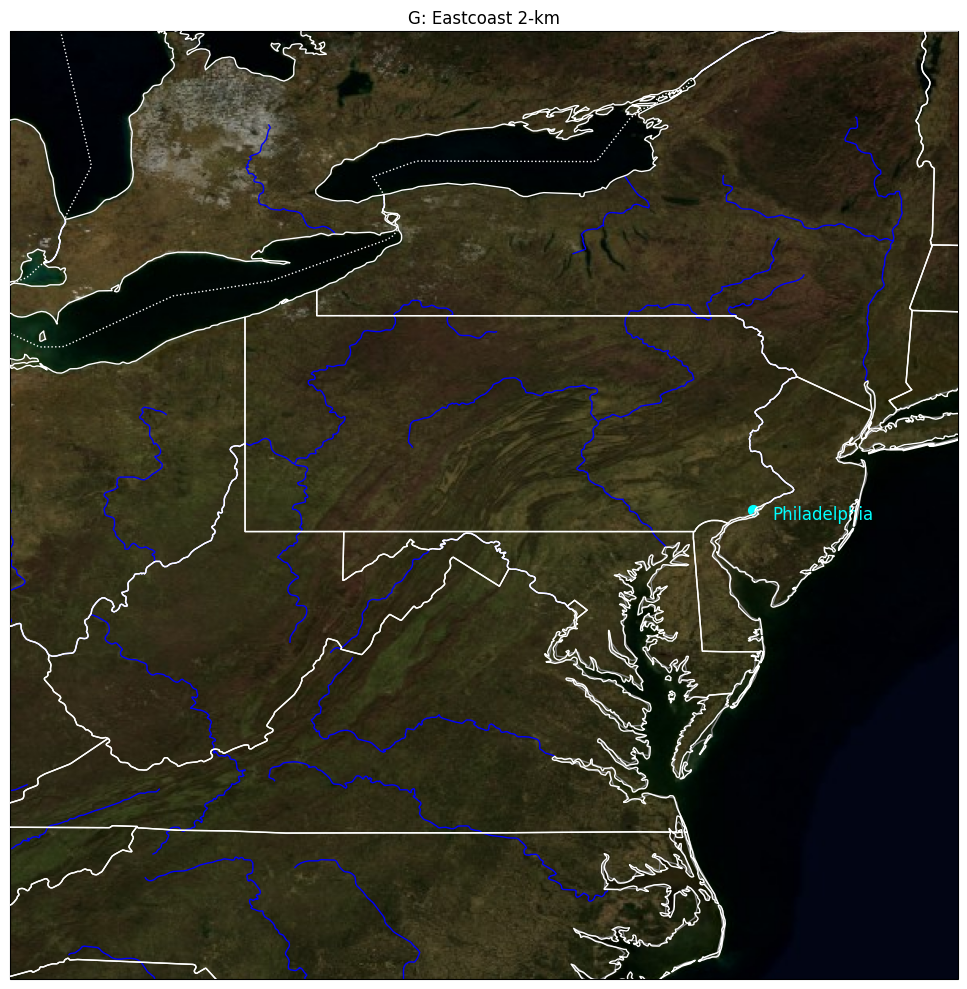

In [38]:
# >> G. Pick ANOTHER part of the Earth - not Illinois!!
#
#  1. You choose the NASA background and domain. Use your world2km image.
#    a) Use your world2km image
#  2. Make a map for it.
#    a) Choose the map region with set_extent (NOT global!)
#    b) Add some overlays - e.g. Lakes or rivers, coastlines.
#  3. Final step: pick a major city in your map.  Get its latitude and longitude.
#     Add a dot and city name in colors that can be seen against the map.
#  4. Add a title that starts with letters "G: "


fig = plt.figure(figsize=(15, 10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(world2km, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.set_extent([-83, -73, 35, 45], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.RIVERS, edgecolor='blue')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='white')
ax.coastlines(color="gray",resolution='50m')
# ax.set_global()
states_provinces = cfeature.STATES.with_scale('10m')
ax.add_feature(states_provinces, edgecolor='white', zorder=10)
ax.text(-75.16 + 0.2, 39.95 - 0.1, 'Philadelphia', transform=ccrs.PlateCarree(), fontsize=12, color='cyan')
ax.scatter(-75.16, 39.95, color='cyan', s=50, transform=ccrs.PlateCarree())
ax.set_title('G: Eastcoast 2-km');
plt.tight_layout()

In [ ]:
# USE THIS cell to SAVE NOTEBOOK as HTML
# %%shell
# jupyter nbconvert --to html  NAME